In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions.sampling_functions import generate_Orthogonal, generate_sobol
from functions.simulation_functions import run_simulation
from functions.util import SEED

## Comparing Orthogonal with Sobol Sampling

Sample size is power of 2 and perfect square. This is done to get optimum performance for both orthogonal and Sobol Sampling. In this project, orthogonal is designed for a perfect square sample size
Sobol is implemented for sample sizes of power of 2
Their performance is very close with respect to the converegnce rate for a Mandelbrot Area.
Therefore, to analyze their unbiased Area estimation we have taken a samples size which is a power of 2 and a perfect square.


In [ ]:
sample_size = []

for num in range(8,17,2):
    sample_size.append(np.power(2,num))
    
test_functions = [generate_Orthogonal, generate_sobol]
np.random.seed(SEED)
    

simulation_runs = 500
n_iterations = 1000

std_orthogonal = []
std_sobol = []

for sample in sample_size:
    for i in range(len(test_functions)):
        mean_area, std_area, calc_time, sample_data = run_simulation(simulation_runs,sample,n_iterations=n_iterations,re_lim=(-2,1), im_lim=(-1.25,1.25), function=test_functions[i])
        if(i%2 == 0):
            std_orthogonal.append(std_area)
        else:
            std_sobol.append(std_area)
        # print(std_area)

Here, we see that Sobol has smaller standard deviation( $var = {(std)}^2$) as compared to orthogonal
We are sampling for the same sample size. Therefore, we get a slightly better converegence with the quasi monte carlo method.

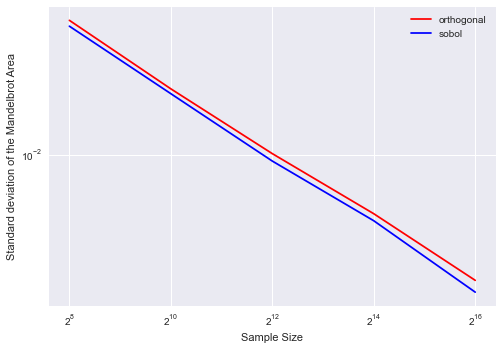

In [12]:
# Here, we see that Sobol has smaller standard deviation(variance = square(standard_deviation)) as compared to orthogonal
# sampling for the same sample size. Therefore, we get a slightly better converegence with the quasi monte carlo method.
plt.plot(sample_size, std_orthogonal, label = "orthogonal",color='r')
plt.plot(sample_size, std_sobol, label = "sobol",color='b')

plt.xscale("log", base = 2)
plt.xticks(sample_size)
plt.xlabel("Sample Size")

plt.yscale("log")
plt.ylabel("Standard deviation of the Mandelbrot Area")
plt.legend()
plt.show()